# Fastdup Tutorial: Analyze Video

In [1]:
!pip install -U fastdup


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 39.2 MB 1.2 MB/s 
  Attempting uninstall: fastdup
    Found existing installation: fastdup 0.82
    Uninstalling fastdup-0.82:
      Successfully uninstalled fastdup-0.82


## Download Meva dataset

### Meva dataset - Multi View Extended Video Dataset 
https://mevadata.org/resources/README-meva-kf1-data.html 

Note that we download a small subset as this data does not fit a Colab drive.

In [14]:
!pip install awscli

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!aws configure # configure your s3 access using your credentials to download the dataset

In [4]:
!aws s3 sync s3://mevadata-public-01/drop-4-hadcv22/2018-03-08 ./meva/ 

download: s3://mevadata-public-01/drop-4-hadcv22/2018-03-08/11/2018-03-08.11-10-00.11-15-00.school.G421.r13.avi to meva/11/2018-03-08.11-10-00.11-15-00.school.G421.r13.avi
download: s3://mevadata-public-01/drop-4-hadcv22/2018-03-08/13/2018-03-08.13-25-02.13-30-02.hospital.G301.r13.avi to meva/13/2018-03-08.13-25-02.13-30-02.hospital.G301.r13.avi
download: s3://mevadata-public-01/drop-4-hadcv22/2018-03-08/13/2018-03-08.13-20-02.13-25-02.hospital.G301.r13.avi to meva/13/2018-03-08.13-20-02.13-25-02.hospital.G301.r13.avi
download: s3://mevadata-public-01/drop-4-hadcv22/2018-03-08/10/2018-03-08.10-05-02.10-10-01.hospital.G301.r13.avi to meva/10/2018-03-08.10-05-02.10-10-01.hospital.G301.r13.avi
download: s3://mevadata-public-01/drop-4-hadcv22/2018-03-08/13/2018-03-08.13-15-02.13-20-02.hospital.G301.r13.avi to meva/13/2018-03-08.13-15-02.13-20-02.hospital.G301.r13.avi
download: s3://mevadata-public-01/drop-4-hadcv22/2018-03-08/15/2018-03-08.15-30-02.15-35-02.hospital.G301.r13.avi to meva/15

## Run Fastdup to gain insights from video

## Extract feature vectors from Video

Note: video extraction is slow on the free Colab notebook as only 1 core is used. It is recommended to run on a 32 core machine to speed up extraction.

In [2]:
import fastdup
# run fastdup to extract key frames from video. num_images=3 means we run on the first 3 videos.
fastdup.run('meva', work_dir='video', run_mode=1, num_images=3)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
On Jupyter notebook running on large datasets, there may be delay getting the console output. We recommend running using python shell.
Going to loop over dir meva
Found total 3 videos to run on
[■■■■■■■■■■■■■■■■■                                 ] 34% Estimated: 0 Minutes
Wrote total of 302 features atrain_2018-03-08.10-05-02.10-10-01.hospital.G301.r13.avi, found 0 bad images
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■                ] 67% Estimated: 0 Minutes
Wrote total of 302 features atrain_2018-03-08.11-10-00.11-15-00.school.G421.r13.avi, found 0 bad images
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■] 100% Estimated: 0 Minutes
Wrote total of 302 features atrain_2018-03-08.11-10-02.11-15-02.hospital.G301.r13.avi, found 0 bad images


## Build nearest neighbor model

In [3]:
fastdup.run('meva', work_dir='video', run_mode=2)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
On Jupyter notebook running on large datasets, there may be delay getting the console output. We recommend running using python shell.
Read of 302 features
Read of 302 features
Read of 302 features
Read of 302 features
Read of 302 features
Read of 302 features
Read of 302 features
Read of 302 features
Found total 2416 images to run on
0) Finished write_index() faiss
Stored faiss index file video/faiss.index
1655148478 : INFO:     (add_vertices:460): Num vertices for group 0: 2416
1655148478 : INFO:     (commit_edge_buffer:609): In commit edge buffer (0,0)
1655148478 : INFO:     (commit_edge_buffer:680): Shuffling edges ...
1655148478 : INFO:     (commit_edge_buffer:688): Done shuffling edges in 0.018399 secs
1655148478 : INFO:     (commit_edge_buffer:692): Aggregating unique vertices...
1655148478 : INFO:     (commit_edge_buffer:705): Done aggregating unique vertex in 0.002989 secs
1655148478 : INFO:     (commit

## Visualize outliers

In [6]:
fastdup.create_outliers_gallery('video/outliers.csv', save_path='.', num_images=50)
                                

100%|██████████| 50/50 [00:01<00:00, 48.78it/s]


Stored outliers visual view in  ./outliers.html



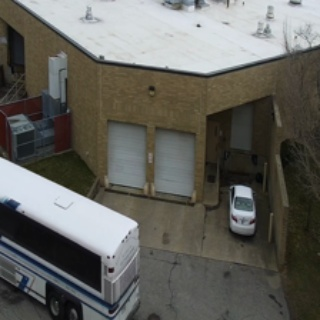
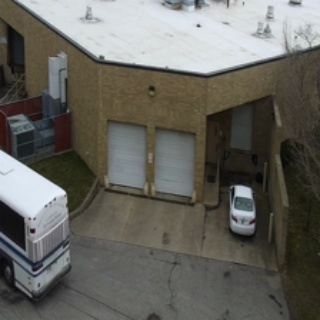
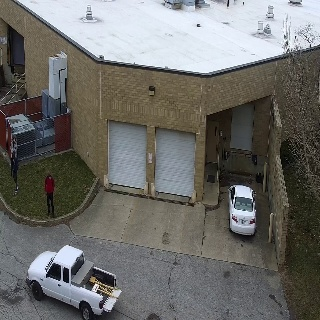
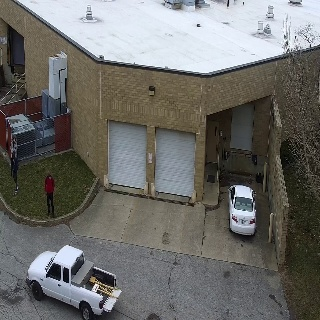
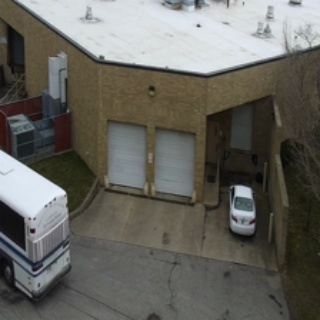
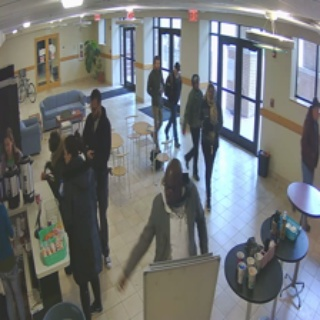
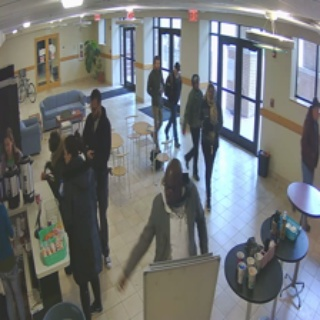
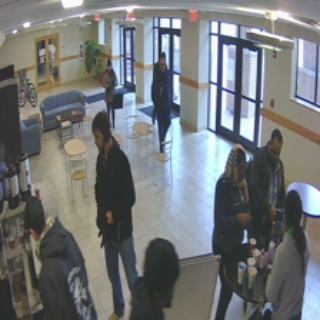
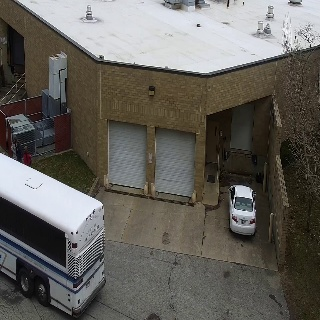
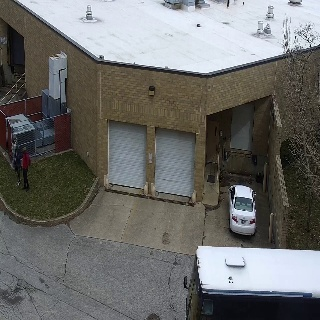
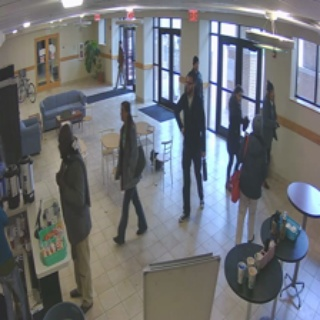
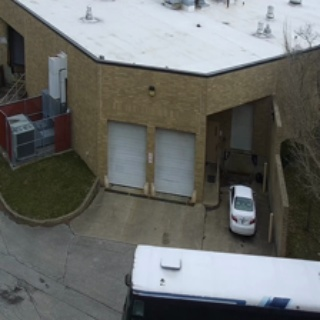
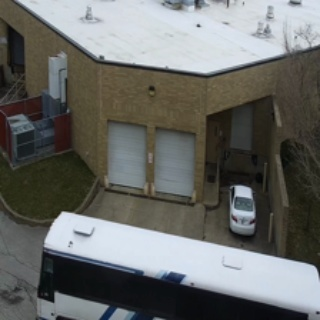
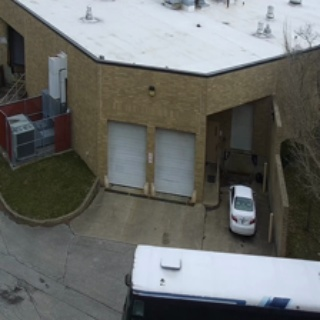
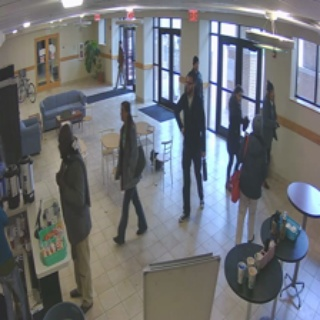
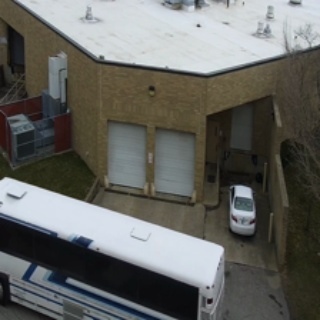
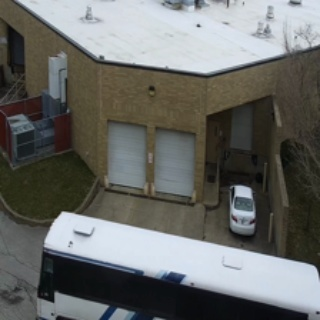
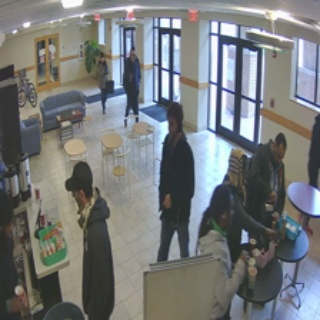
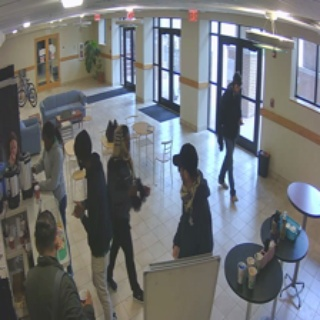
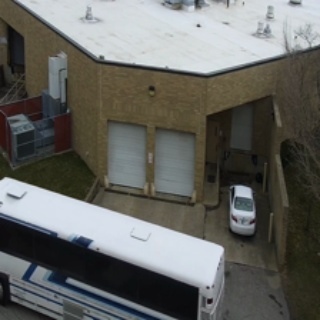
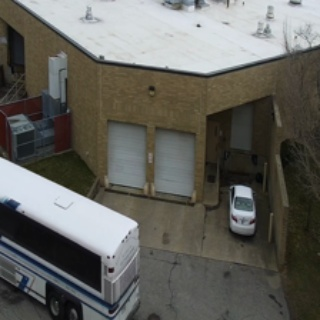
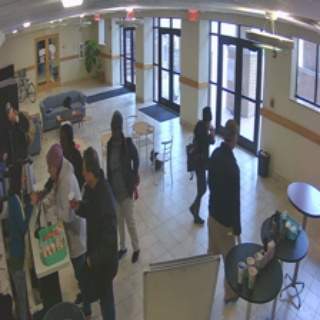
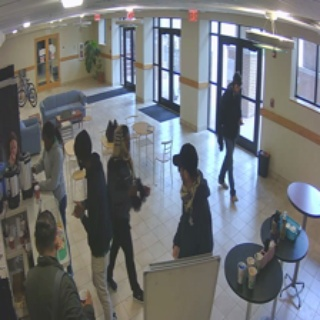
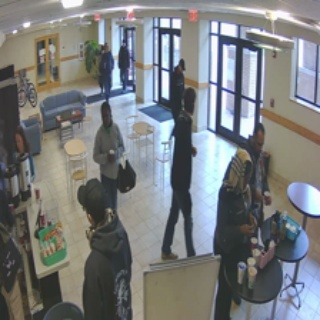
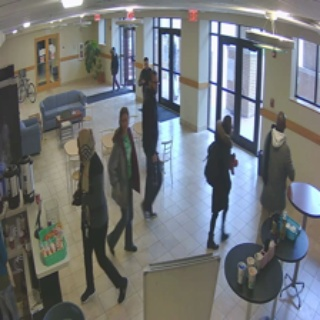
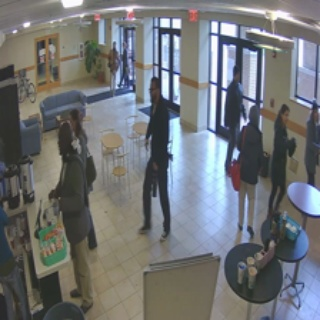
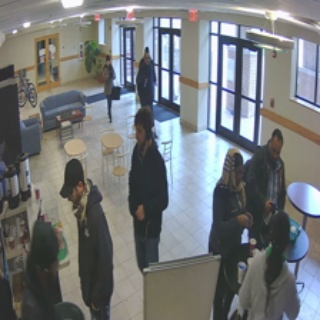
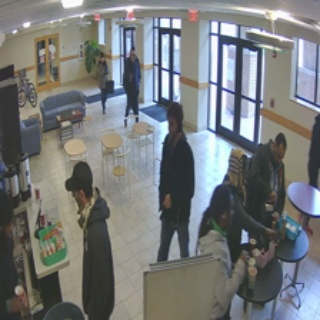
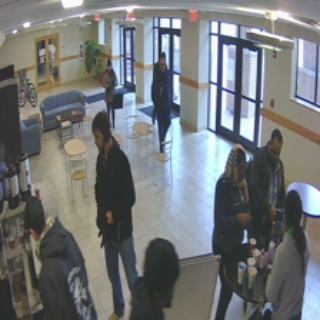
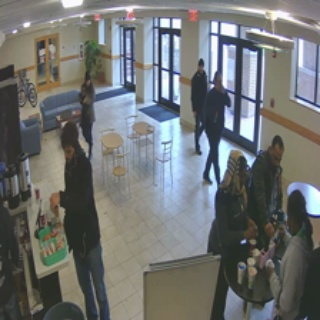
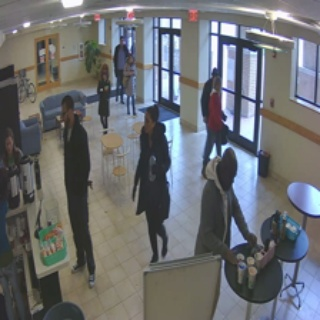
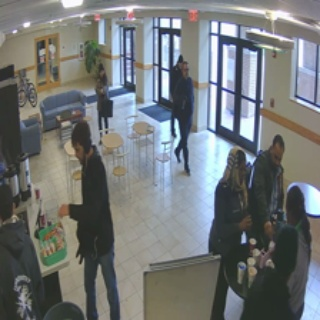
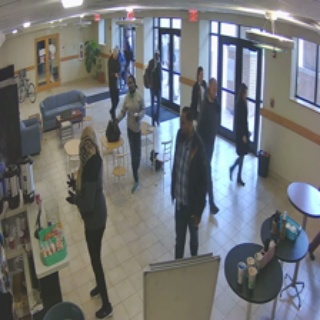
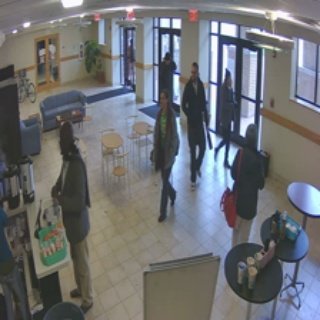
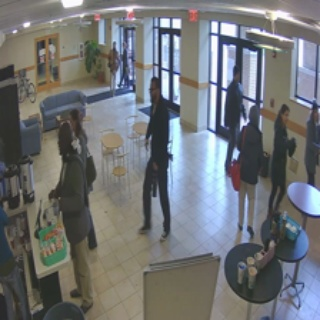
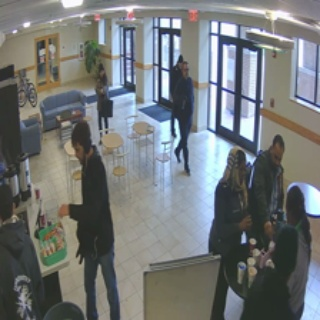
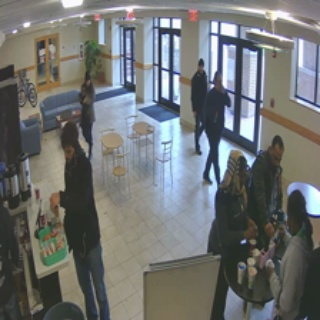
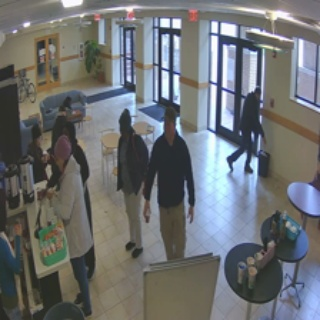
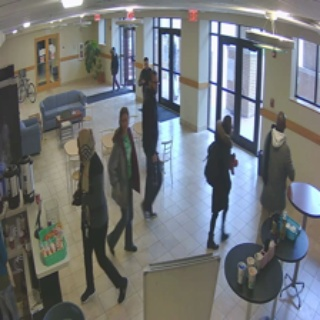
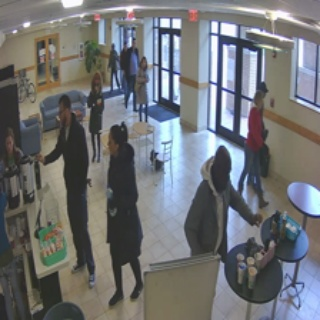
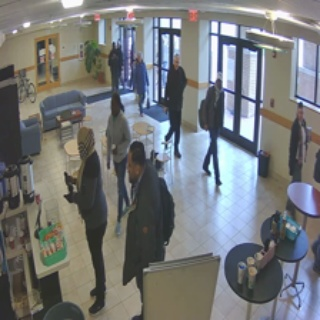
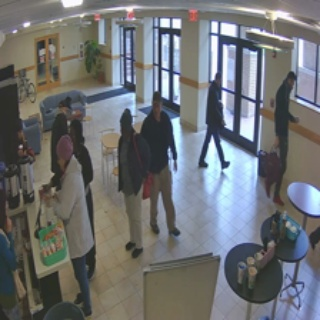
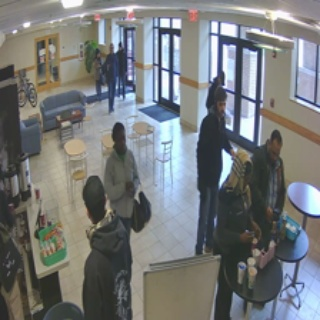
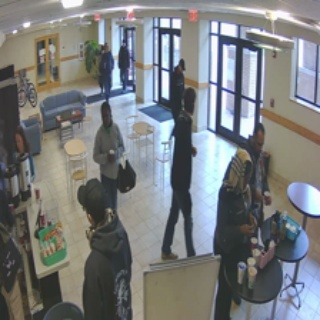
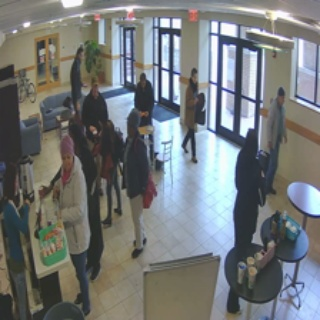
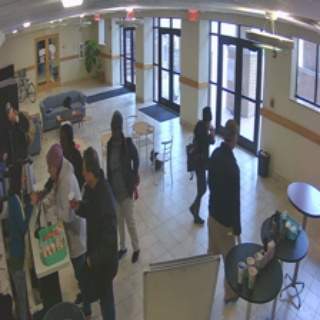
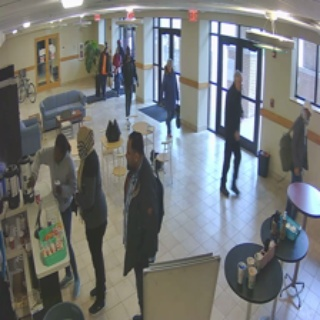
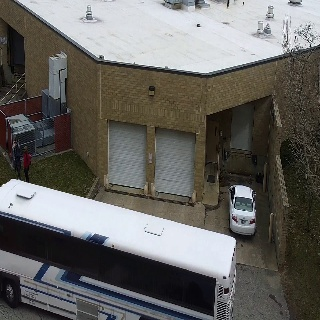
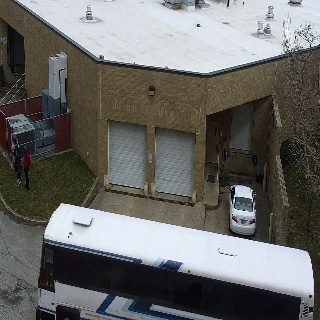
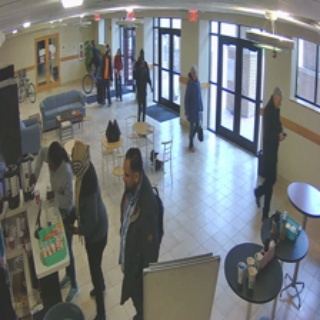

In [7]:
from IPython.display import HTML
HTML('outliers.html')

## Find similarities across different videos

In [19]:
import pandas as pd
data = pd.read_csv('video/similarity.csv')

In [20]:
import os
data['video1'] = data['from'].apply(lambda x: os.path.dirname(x))
data['video2'] = data['to'].apply(lambda x: os.path.dirname(x))
data2 = data[data['video1'] != data['video2']]
data2.tail(20).to_csv('similarity2.csv')

In [21]:
fastdup.create_duplicates_gallery('similarity2.csv', save_path='.',descending=False)

 75%|███████▌  | 15/20 [00:01<00:00,  8.74it/s]


Stored similarity visual view in  ./similarity.html



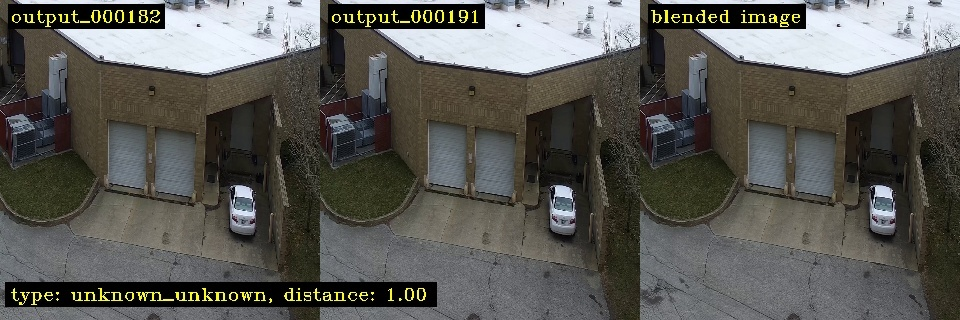
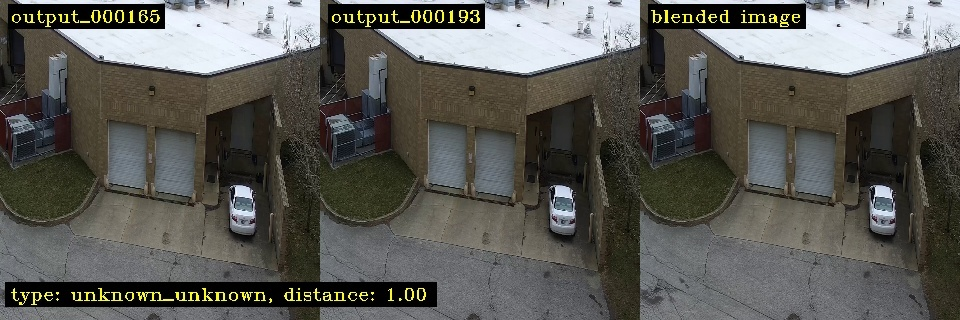
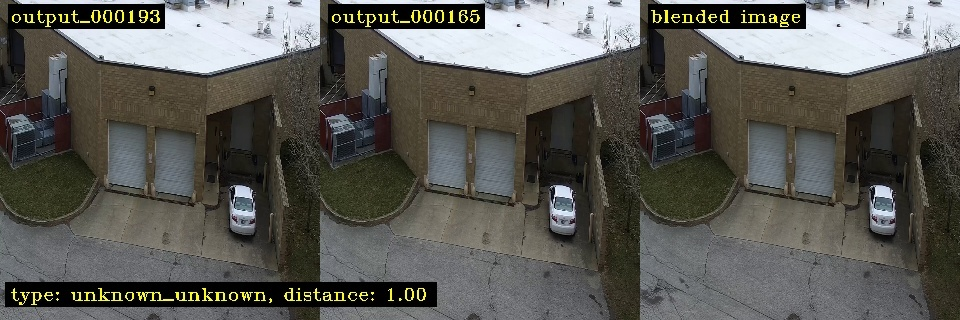
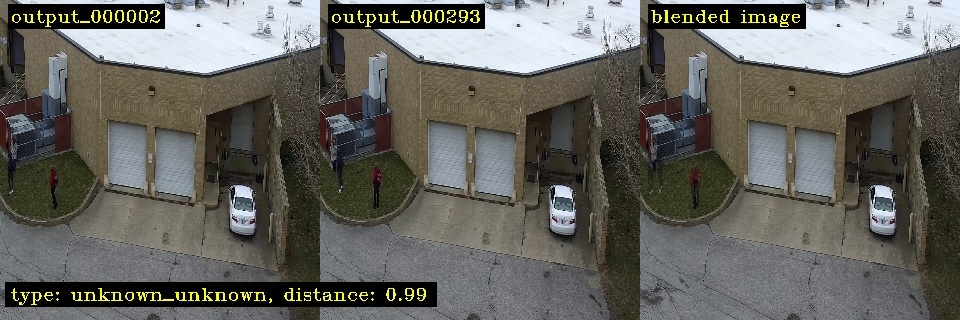
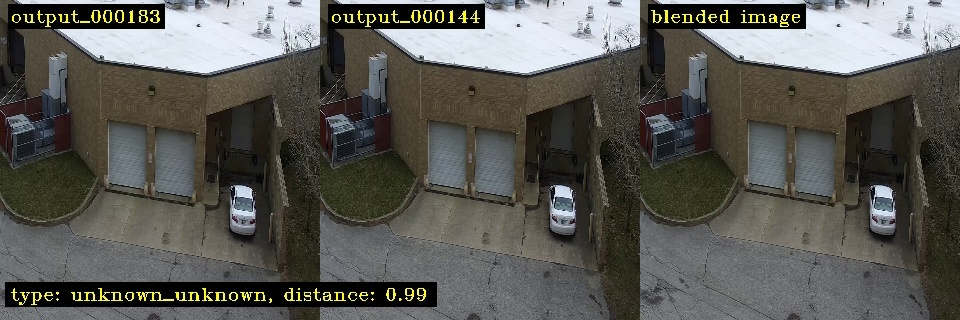
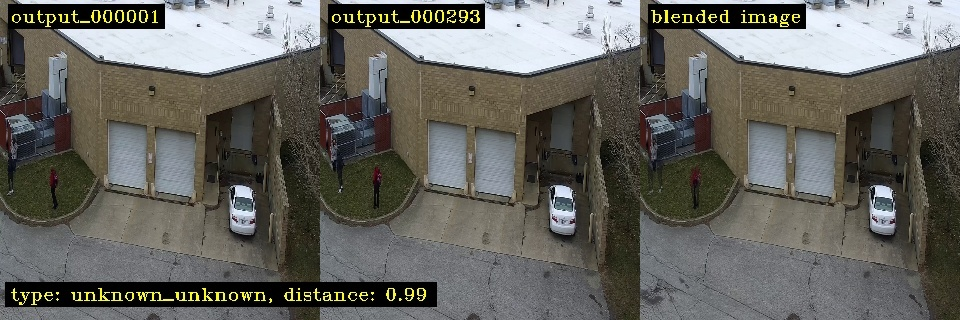
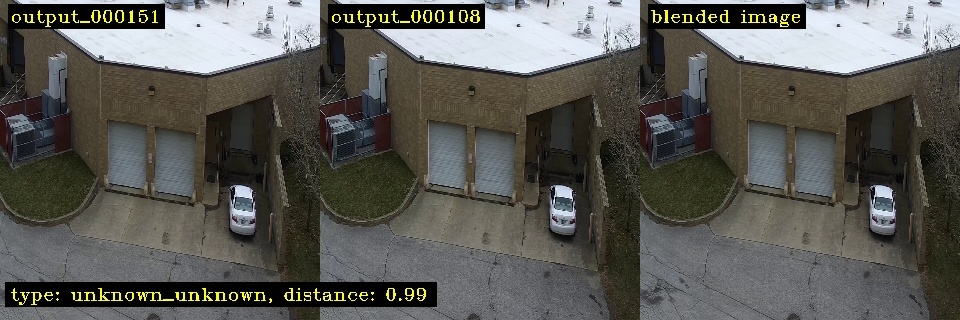
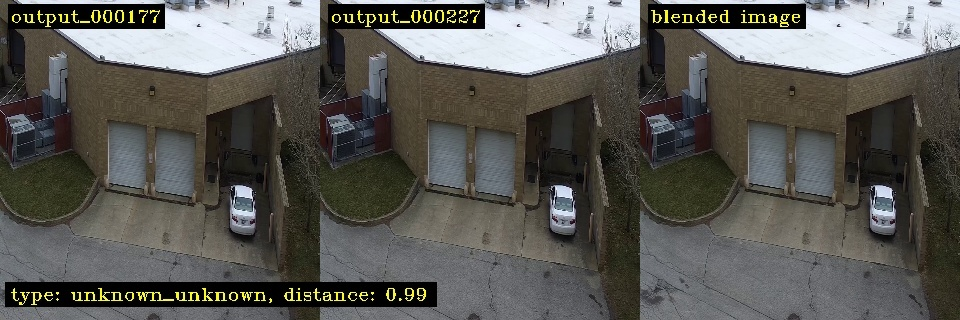
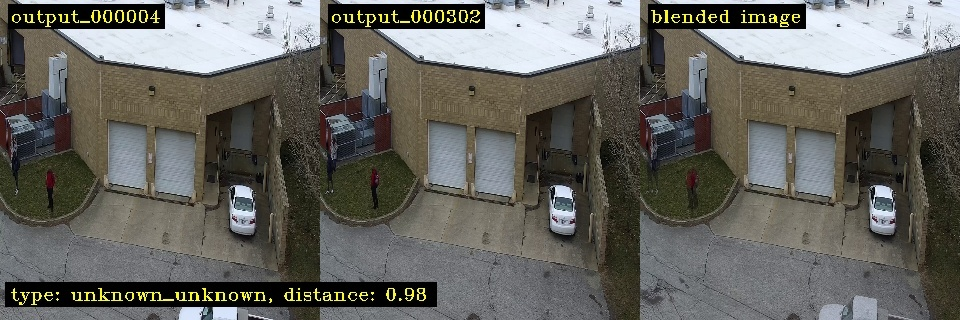
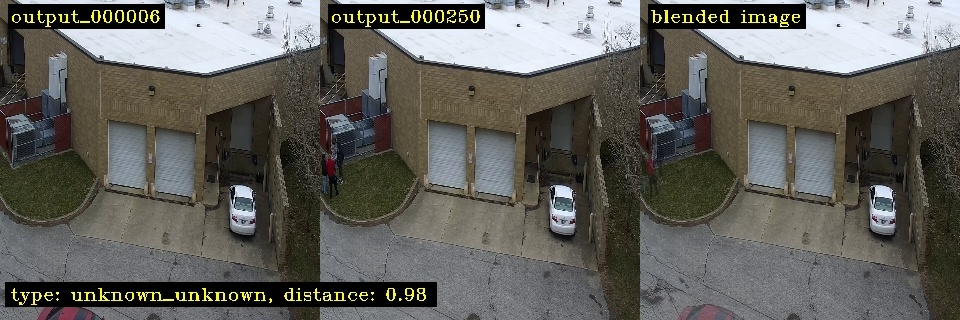
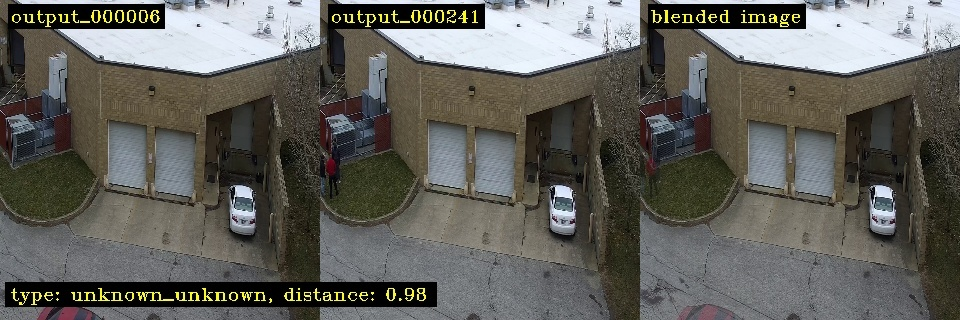
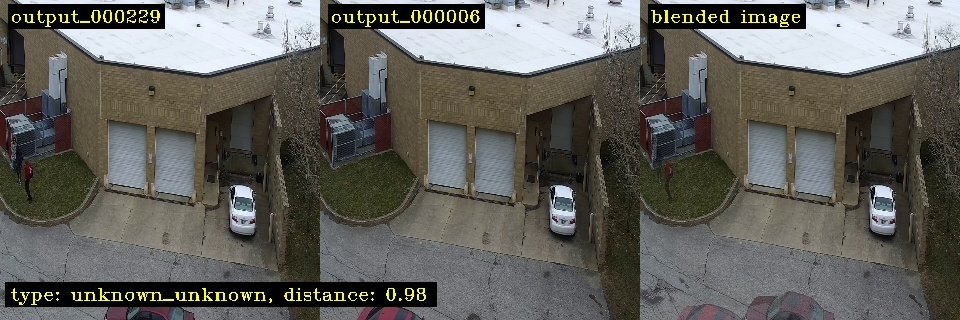
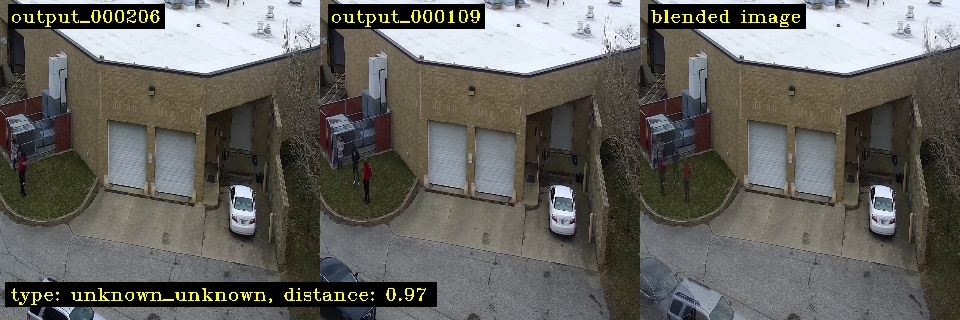
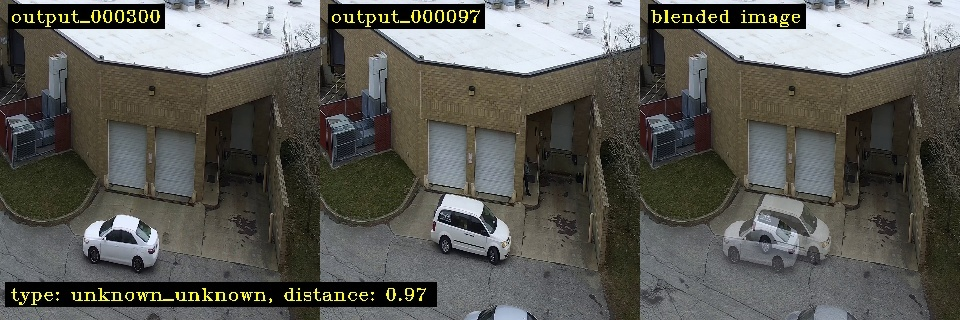
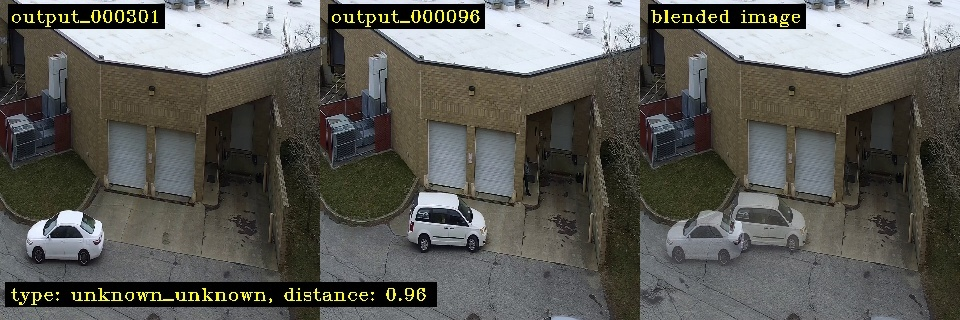

In [22]:
HTML('similarity.html')